# ***(a) Install Pycaret***

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


# ***1. Clustering***

# ***1.1 Get the IRIS dataset***

In [ ]:
import pandas as pd

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=columns)

# Drop the target column (since clustering is unsupervised)
df.drop(columns='class', inplace=True)
df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# ***1.2 Parameter Setting***

In [ ]:
from pycaret.clustering import *
clustering_Setup = setup(df, normalize=True)

,Description,Value
0,Session id,7505
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


# ***1.3 Building "Kmeans" Clustering Model***

In [ ]:
kmeans_model = create_model('kmeans')
print(kmeans_model)
# print("For Cluster = 3")
# x = create_model('kmeans', num_clusters = 3)

# print("For Cluster = 4")
# x = create_model('kmeans', num_clusters = 4)

# print("For Cluster = 5")
# x = create_model('kmeans', num_clusters = 5)

# print("For Cluster = 6")
# x = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6178,1352.6687,0.5292,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=4158)


# ***1.4 Assign Model***

In [ ]:
kMeanPrediction = assign_model(kmeans_model)
kMeanPrediction

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Cluster 0
146,6.3,2.5,5.0,1.9,Cluster 3
147,6.5,3.0,5.2,2.0,Cluster 3
148,6.2,3.4,5.4,2.3,Cluster 0


# ***1.5 Evaluate Model***

In [ ]:
evaluate_model(kmeans_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# ***1.6 Plot for Clusters***

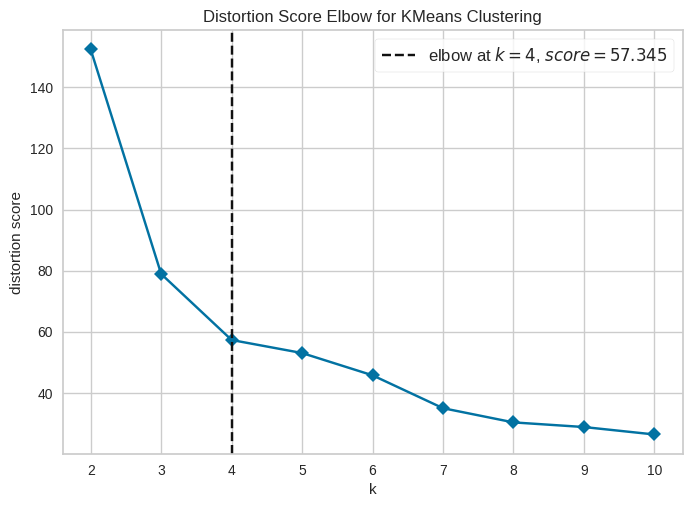

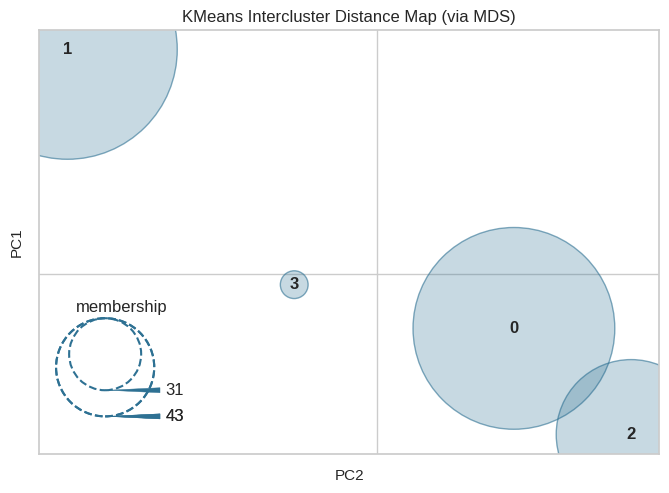

In [ ]:
# 2D
plot_model(kmeans_model,plot='cluster')
#Elbow plot
plot_model(kmeans_model,plot='elbow')
#silhouette plot
plot_model(kmeans_model, plot = 'distance')
#3D tsne
plot_model(kmeans_model,plot='tsne')

# ***2. Make Predictions***

In [ ]:
feature_names = kmeans_model.feature_names_in_
print(feature_names)

newData = df.loc[:9, feature_names]
newData

# newPredictions = predict_model(kmeans_model, data=newData)
# newPredictions

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# ***3. Clustering Applying "Preprocessing"***

### **3.1 Preprocessing with min max scaling**

In [ ]:
setup_minmax = setup(df, normalize_method='minmax')

,Description,Value
0,Session id,4694
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


# **3.2 Preprocessing with PCA**

In [ ]:
setup_pca = setup(df, pca=True, pca_components=2, session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 2)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


In [ ]:
agglomerative_model = create_model('hclust')
print(agglomerative_model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5409,672.5698,0.6549,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=4)


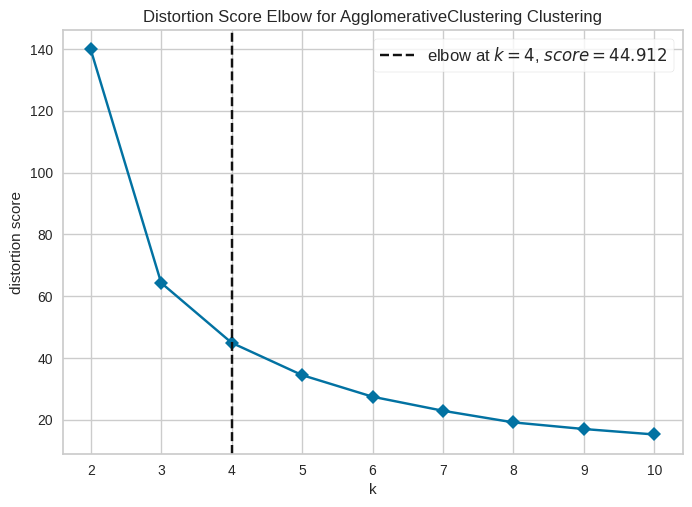

In [ ]:
plot_model(agglomerative_model,plot='elbow')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

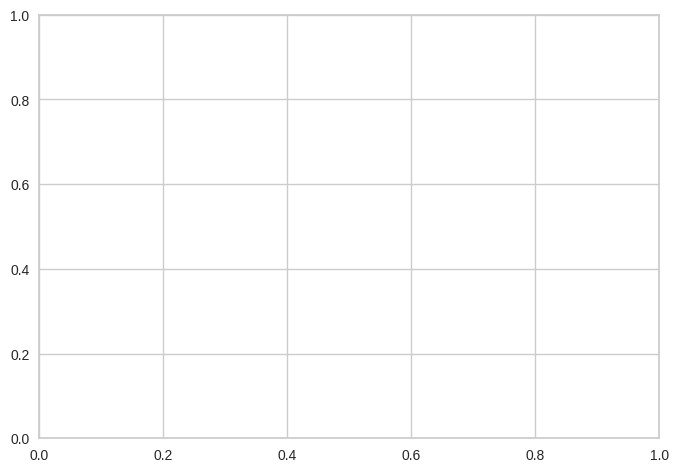

In [ ]:
evaluate_model(agglomerative_model)

# ***4. Model performance using Transformation***

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('dbscan')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7633,762.9648,0.2606,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***4.2 Evaluation parameters***

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7633,762.9648,0.2606,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7633,762.9648,0.2606,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7633,762.9648,0.2606,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7633,762.9648,0.2606,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***5. performace using "PCA"***

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7722,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

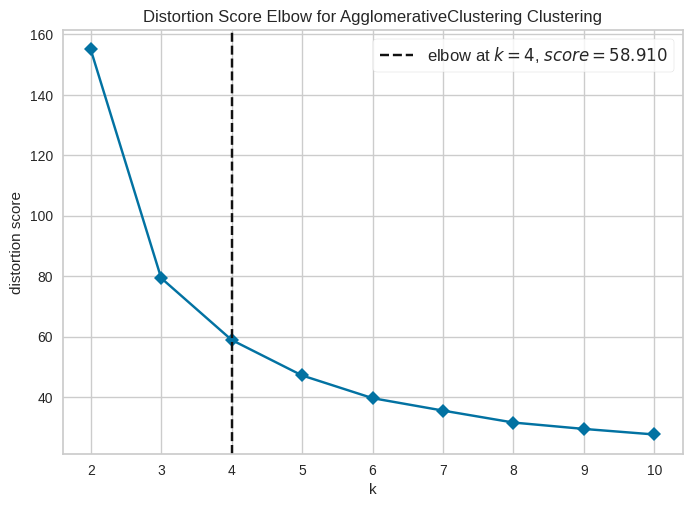

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x,plot='elbow')

## ***5.1 Evaluation Parameters***

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5541,556.8412,0.6566,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7722,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4842,487.0705,0.8207,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3619,465.7317,0.9231,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***6. Model performance using "transformation"+"normalization"***

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3876,207.0176,0.8819,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

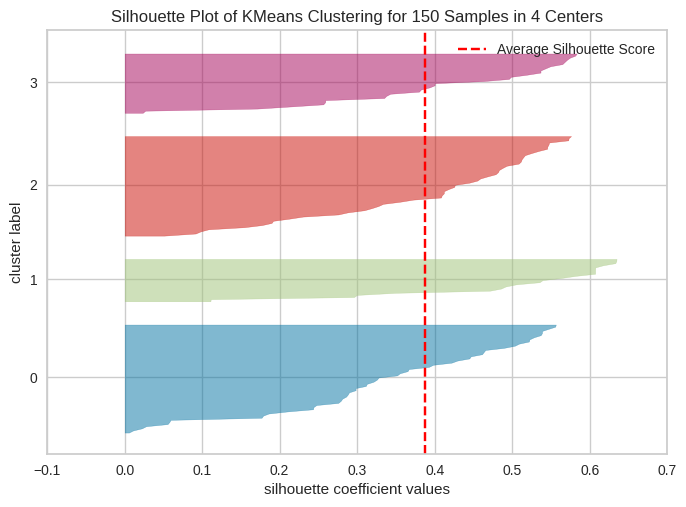

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x,plot='silhouette')

## ***6.1 Evaluation Parameters***

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'maxabs', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6313,911.7294,0.5354,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5310,821.8825,0.6946,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5142,786.4092,0.7571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4954,705.4435,0.8496,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***7. Model Performance using "Transformation" + "Normalization" + "PCA"***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'robust', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4612,162.2619,0.7233,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***7.1 Evaluation Parameters***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4575,242.9960,0.8385,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4185,210.2697,0.9307,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3882,166.6624,1.0930,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3284,177.3416,1.0413,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]